In [1]:
import pandas as pd
import numpy as np

In [2]:
#dataset = pd.read_csv("german_credit_data.csv")
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_7de148c41ebe4d3a837c14ff28cefc64 = 'https://s3.us.cloud-object-storage.appdomain.cloud'
else:
    endpoint_7de148c41ebe4d3a837c14ff28cefc64 = 'https://s3.private.us.cloud-object-storage.appdomain.cloud'

client_7de148c41ebe4d3a837c14ff28cefc64 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='77qtosWAo_LfQ_Tb8KBpJbtnyyzEBVCoYpDAGiYfcbji',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_7de148c41ebe4d3a837c14ff28cefc64)

body = client_7de148c41ebe4d3a837c14ff28cefc64.get_object(Bucket='frmmodeldeployment-donotdelete-pr-7dn9gxo8pr0dmi',Key='german_credit_data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

dataset = pd.read_csv(body)
dataset.shape


(1000, 10)

In [3]:
dataset.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,little,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [4]:
dataset.drop(["Purpose"],axis=1,inplace=True)

In [5]:
dataset.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk
0,67,male,2,own,little,little,1169,6,good
1,22,female,2,own,little,moderate,5951,48,bad
2,49,male,1,own,little,NaN,2096,12,good
3,45,male,2,free,little,little,7882,42,good
4,53,male,2,free,little,little,4870,24,bad


In [6]:
dataset.isnull().any()

Age                 False
Sex                 False
Job                 False
Housing             False
Saving accounts      True
Checking account     True
Credit amount       False
Duration            False
Risk                False
dtype: bool

In [7]:
dataset['Saving accounts'].fillna(dataset['Saving accounts'].mode()[0],inplace = True)
dataset['Checking account'].fillna(dataset['Checking account'].mode()[0],inplace = True)

In [8]:
 dataset.isnull().any()

Age                 False
Sex                 False
Job                 False
Housing             False
Saving accounts     False
Checking account    False
Credit amount       False
Duration            False
Risk                False
dtype: bool

In [9]:
dataset["Duration"].unique()

array([ 6, 48, 12, 42, 24, 36, 30, 15,  9, 10,  7, 60, 18, 45, 11, 27,  8,
       54, 20, 14, 33, 21, 16,  4, 47, 13, 22, 39, 28,  5, 26, 72, 40])

In [10]:
dataset["Sex"].unique()

array(['male', 'female'], dtype=object)

In [11]:
dataset["Housing"].unique()

array(['own', 'free', 'rent'], dtype=object)

In [12]:
dataset["Saving accounts"].unique()

array(['little', 'quite rich', 'rich', 'moderate'], dtype=object)

In [13]:
dataset["Checking account"].unique()

array(['little', 'moderate', 'rich'], dtype=object)

In [14]:
dataset["Risk"].unique()

array(['good', 'bad'], dtype=object)

In [15]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dataset["Sex"]=le.fit_transform(dataset["Sex"])
dataset["Housing"]=le.fit_transform(dataset["Housing"])
dataset["Saving accounts"]=le.fit_transform(dataset["Saving accounts"])
dataset["Checking account"]=le.fit_transform(dataset["Checking account"])
dataset["Risk"]=le.fit_transform(dataset["Risk"])

In [16]:
 dataset.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk
0,67,1,2,1,0,0,1169,6,1
1,22,0,2,1,0,1,5951,48,0
2,49,1,1,1,0,0,2096,12,1
3,45,1,2,0,0,0,7882,42,1
4,53,1,2,0,0,0,4870,24,0


In [17]:
dataset.corr()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk
Age,1.000000,0.161694,0.015673,-0.301419,0.015772,-0.027176,0.032716,-0.036136,0.091127
Sex,0.161694,1.000000,0.070298,-0.219844,-0.014425,-0.012705,0.093482,0.081432,0.075493
Job,0.015673,0.070298,1.000000,-0.107191,-0.034596,-0.043277,0.285385,0.210910,-0.032735
Housing,-0.301419,-0.219844,-0.107191,1.000000,0.043324,-0.028196,-0.135632,-0.157049,-0.019315
Saving accounts,0.015772,-0.014425,-0.034596,0.043324,1.000000,0.015763,-0.077929,-0.043274,0.102751
Checking account,-0.027176,-0.012705,-0.043277,-0.028196,0.015763,1.000000,0.006953,0.004163,-0.052375
Credit amount,0.032716,0.093482,0.285385,-0.135632,-0.077929,0.006953,1.000000,0.624984,-0.154739
Duration,-0.036136,0.081432,0.210910,-0.157049,-0.043274,0.004163,0.624984,1.000000,-0.214927
Risk,0.091127,0.075493,-0.032735,-0.019315,0.102751,-0.052375,-0.154739,-0.214927,1.000000


In [18]:
x=dataset.iloc[:,0:8]
x.shape

(1000, 8)

In [19]:
x=dataset.iloc[:,0:8].values
y=dataset.iloc[:,8:9].values

In [20]:
x

array([[  67,    1,    2, ...,    0, 1169,    6],
       [  22,    0,    2, ...,    1, 5951,   48],
       [  49,    1,    1, ...,    0, 2096,   12],
       ...,
       [  38,    1,    2, ...,    0,  804,   12],
       [  23,    1,    2, ...,    0, 1845,   45],
       [  27,    1,    2, ...,    1, 4576,   45]])

In [21]:
x.shape #Total 8 cols in the input.

(1000, 8)

In [22]:
y.shape

(1000, 1)

In [23]:
#from sklearn.preprocessing import OneHotEncoder
#one = OneHotEncoder()

In [24]:
#z=one.fit_transform(x[:,1:2]).toarray()

In [25]:
#x=np.delete(x,[1],axis=1)
#x=np.concatenate((z,x),axis=1)

In [26]:
x.shape

(1000, 8)

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=0)

In [28]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [29]:
import pickle
pickle.dump(sc,open("scalar.pkl",'wb'))

In [30]:
x_train.shape

(800, 8)

In [31]:
x_test.shape

(200, 8)

In [32]:
dataset.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk
0,67,1,2,1,0,0,1169,6,1
1,22,0,2,1,0,1,5951,48,0
2,49,1,1,1,0,0,2096,12,1
3,45,1,2,0,0,0,7882,42,1
4,53,1,2,0,0,0,4870,24,0


In [33]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(random_state=5,criterion="entropy")
dtc.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=5)

In [34]:
!pip install ibm_watson_machine_learning

/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


In [35]:
from ibm_watson_machine_learning import APIClient
wml_credentials = {
    "url": "https://us-south.ml.cloud.ibm.com",
    "apikey": "VDTCF49MO0QvZnruXmP3TdiJa_80mKvqdYb4OqYr8dFL"
}
client = APIClient(wml_credentials)

In [36]:
def guid_from_space_name(client, space_name):
    space = client.spaces.get_details()
    #print(space)
    return(next(item for item in space['resources'] if item['entity']["name"] == space_name)['metadata']['id'])

In [37]:
space_uid = guid_from_space_name(client, 'models')
print("Space UID = " + space_uid)

Space UID = c6f2c3f0-e807-4882-8b87-3c420280e404


In [38]:
client.set.default_space(space_uid)

'SUCCESS'

In [39]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
scikit-learn_0.22-py3.6        154010fa-5b3b-4ac1-82af-4d5ee5abbc85  base
default_r3.6                   1b70aec3-ab34-4b87-8aa0-a4a3c8296a36  base
pytorch-onnx_1.3-py3.6         1bc6029

In [40]:
software_spec_uid = client.software_specifications.get_uid_by_name("default_py3.7")
software_spec_uid

'e4429883-c883-42b6-87a8-f419d64088cd'

In [41]:
model_details = client.repository.store_model(model=dtc,meta_props={
    client.repository.ModelMetaNames.NAME: "Financial_Risk_Management",
    client.repository.ModelMetaNames.TYPE: "scikit-learn_0.23",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid }
                                             )
model_id = client.repository.get_model_uid(model_details)

In [42]:
print(model_id)

6181a4dc-6fc3-449c-928d-37c0c2c9213c


In [43]:
dtcpred=dtc.predict(x_test)
dtcpred

array([0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1])

In [44]:
y_test

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
    

In [45]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,dtcpred)
accuracy

0.585

In [46]:
from sklearn.metrics import confusion_matrix
dtcm=confusion_matrix(y_test,dtcpred)

In [47]:
dtcm

array([[20, 38],
       [45, 97]])

In [48]:
import sklearn.metrics as metrics
fpr,tpr,threshold=metrics.roc_curve(y_test,dtcpred)
roc_auc=metrics.auc(fpr,tpr)

Text(0, 0.5, 'tpr')

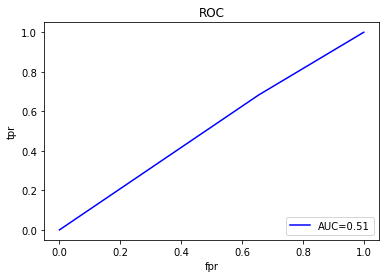

In [49]:
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,"blue",label="AUC=%.2f"%roc_auc)
plt.legend(loc="lower right")
plt.title("ROC")
plt.xlabel("fpr")
plt.ylabel("tpr")

In [50]:
dataset.head(10)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk
0,67,1,2,1,0,0,1169,6,1
1,22,0,2,1,0,1,5951,48,0
2,49,1,1,1,0,0,2096,12,1
3,45,1,2,0,0,0,7882,42,1
4,53,1,2,0,0,0,4870,24,0
5,35,1,1,0,0,0,9055,36,1
6,53,1,2,1,2,0,2835,24,1
7,35,1,3,2,0,1,6948,36,1
8,61,1,1,1,3,0,3059,12,1
9,28,1,3,1,0,1,5234,30,0


In [51]:
dtcr = dtc.predict(sc.fit_transform([[28,1,3,1,0,1,5234,30]]))

In [52]:
dtcr

array([0])

Random Forest Classifier

In [53]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100,criterion="entropy",random_state=5)
rfc.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', random_state=5)

In [54]:
rfcpred=rfc.predict(x_test)

In [55]:
rfcacc=accuracy_score(y_test,rfcpred)

In [56]:
rfcacc

0.7

In [57]:
rfccm=confusion_matrix(y_test,rfcpred)

In [58]:
rfccm

array([[ 16,  42],
       [ 18, 124]])

In [59]:
import sklearn.metrics as metrics
rfcfpr, rfctpr,threshold=metrics.roc_curve(y_test,rfcpred)
rfcroc_auc=metrics.auc(rfcfpr,rfctpr)

Text(0.5, 0, 'tpr')

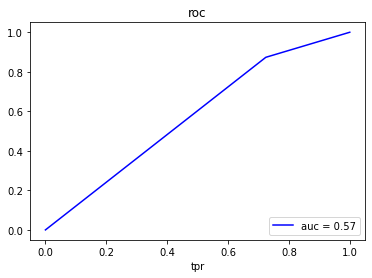

In [60]:
import matplotlib.pyplot as plt
plt.plot(rfcfpr,rfctpr,"b",label="auc = %0.2f"%rfcroc_auc)
plt.legend(loc="lower right")
plt.title("roc")
plt.xlabel("fpr")
plt.xlabel("tpr")

In [61]:
rfc_p = rfc.predict(sc.fit_transform([[28,1,3,1,0,1,5234,30]]))

In [62]:
rfc_p 
#Wrong Value

array([1])

Logistic Regression

In [63]:
from sklearn.linear_model import LogisticRegression
lsr =  LogisticRegression()
lsr.fit(x_train,y_train)

LogisticRegression()

In [64]:
#import pickle
#pickle.dump(lsr,open("frisk.pkl",'wb'))


In [65]:
lrspred=lsr.predict(x_test)

In [66]:
lrspred

array([1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1])

In [67]:
lrsacc=accuracy_score(y_test,lrspred)

In [68]:
lrsacc

0.68

In [69]:

lrscm=confusion_matrix(y_test,lrspred)


In [70]:
lrscm

array([[  8,  50],
       [ 14, 128]])

In [71]:
import sklearn.metrics as metrics
lrsfpr,lrstpr,threshold=metrics.roc_curve(y_test,lrspred)
lrsroc_auc=metrics.auc(lrsfpr,lrstpr)

Text(0.5, 0, 'tpr')

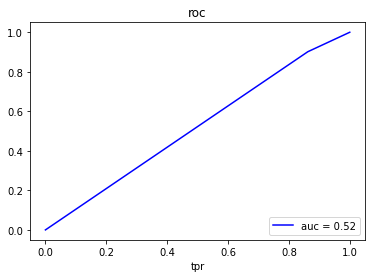

In [72]:
import matplotlib.pyplot as plt
plt.plot(lrsfpr,lrstpr,"b",label="auc = %0.2f"%lrsroc_auc)
plt.legend(loc="lower right")
plt.title("roc")
plt.xlabel("fpr")
plt.xlabel("tpr")

In [73]:
lrs_p= lsr.predict(sc.fit_transform([[3,1,0,1,5234,30,2,5]]))

In [74]:
lrs_p
#Wrong Value

array([1])

Naive Bayes

In [75]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [76]:
nbpred=nb.predict(x_test)

In [77]:
nbpred

array([1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1])

In [78]:
y_test

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
    

In [79]:
from sklearn.metrics import accuracy_score
nbacc=accuracy_score(y_test,nbpred)

In [80]:
nbacc

0.695

In [81]:
from sklearn.metrics import confusion_matrix
navcm=confusion_matrix(y_test,nbpred)

In [82]:
navcm

array([[ 17,  41],
       [ 20, 122]])

In [83]:
import sklearn.metrics as metrics
nbfpr,nbtpr,threshold=metrics.roc_curve(y_test,nbpred)
nbroc_auc=metrics.auc(nbfpr,nbtpr)

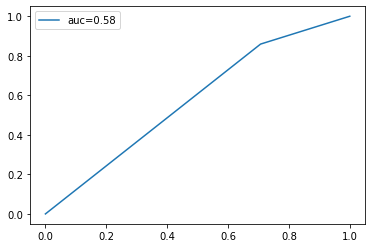

In [84]:
import matplotlib.pyplot as plt
plt.plot(nbfpr,nbtpr,label="auc=%0.2f"%nbroc_auc)
plt.legend()

In [85]:
nb_p= nb.predict(sc.fit_transform([[25,1,3,1,0,1,5234,30]]))

In [86]:
nb_p
#Wrong

array([1])

SVM

In [87]:
from sklearn.svm import SVC
svm=SVC(kernel="rbf",random_state=7)
svm.fit(x_train,y_train)

SVC(random_state=7)

In [88]:
import pickle
pickle.dump(svm,open("svmrisk.pkl",'wb'))


In [89]:
svmpred=svm.predict(x_test)

In [90]:
svmpred

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1])

In [91]:
svmacc=accuracy_score(y_test,svmpred)


In [92]:
svmacc

0.7

In [93]:
svm_p= svm.predict(sc.fit_transform([[50,0,3,1,0,1,5234,30]]))

In [94]:
svm_p

array([1])

In [95]:
import sklearn.metrics as metrics
svmfpr,svmtpr,threshold=metrics.roc_curve(y_test,svmpred)
svmroc_auc=metrics.auc(svmfpr,svmtpr)

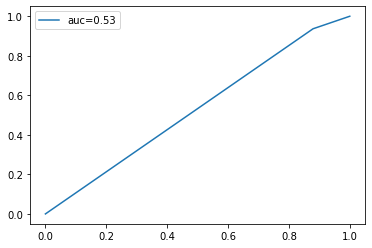

In [96]:
import matplotlib.pyplot as plt
plt.plot(svmfpr,svmtpr,label="auc=%0.2f"%svmroc_auc)
plt.legend()